In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
lena_gray = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

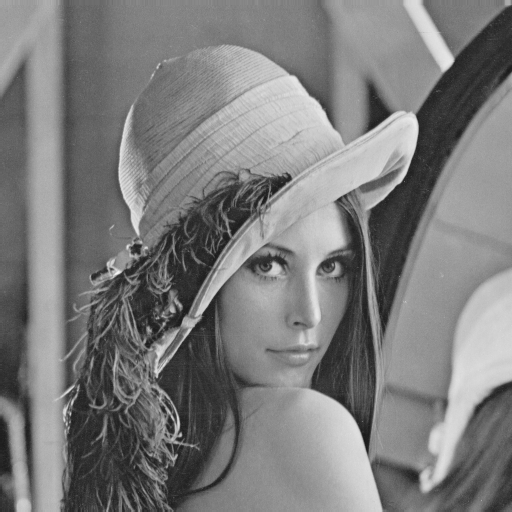

In [ ]:
cv2_imshow(lena_gray)

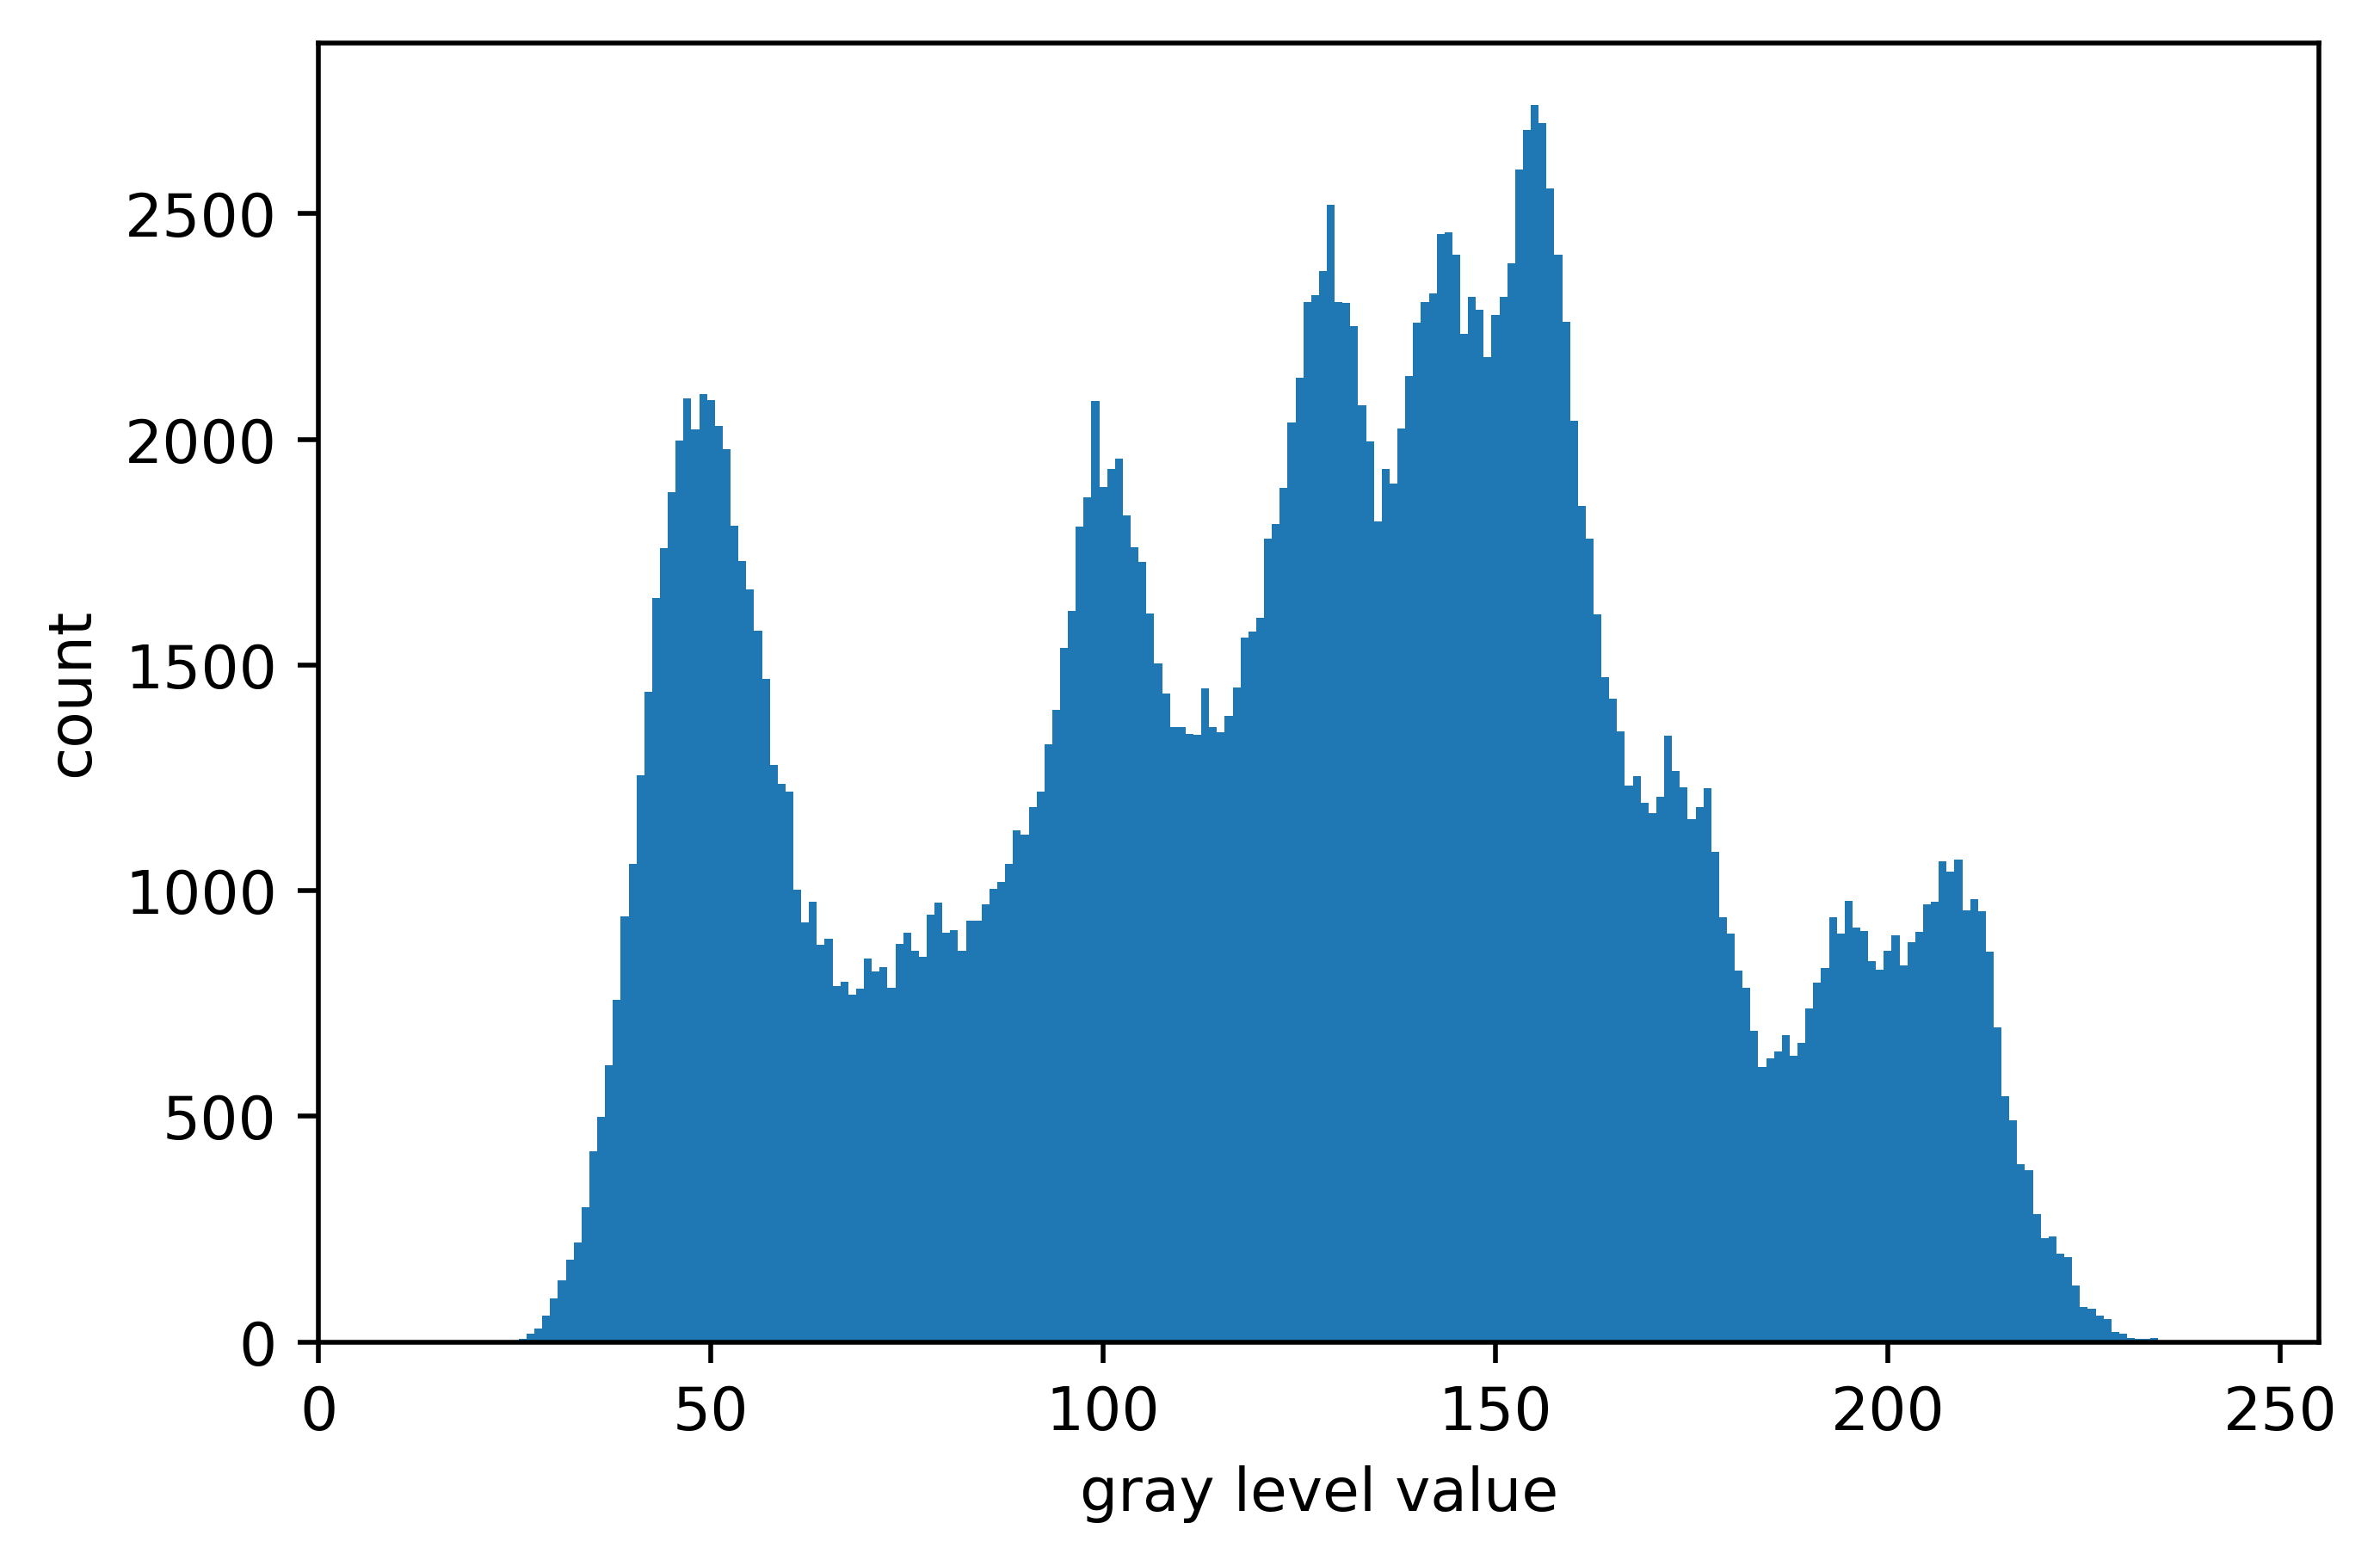

In [ ]:
value_count = [0]*256
for row in lena_gray:
  for pix in row:
    value_count[pix]+=1
plt.figure(dpi=500)
plt.bar(list(range(256)),value_count,1)
plt.xlabel("gray level value")
plt.xlim(0,255)
plt.ylabel("count")
plt.show()

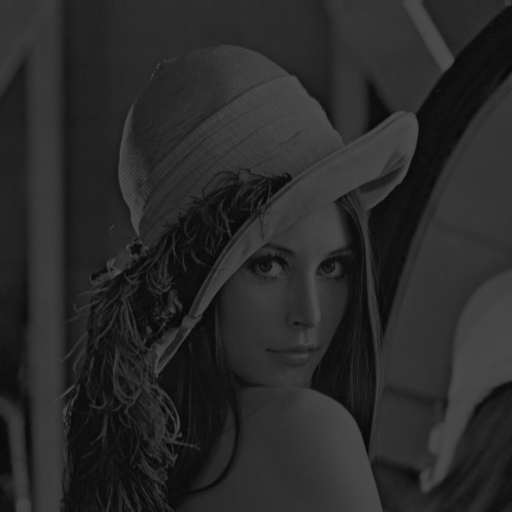

In [ ]:
divid_3_lena_gray = np.uint8(np.rint(lena_gray/3))
cv2_imshow(divid_3_lena_gray)

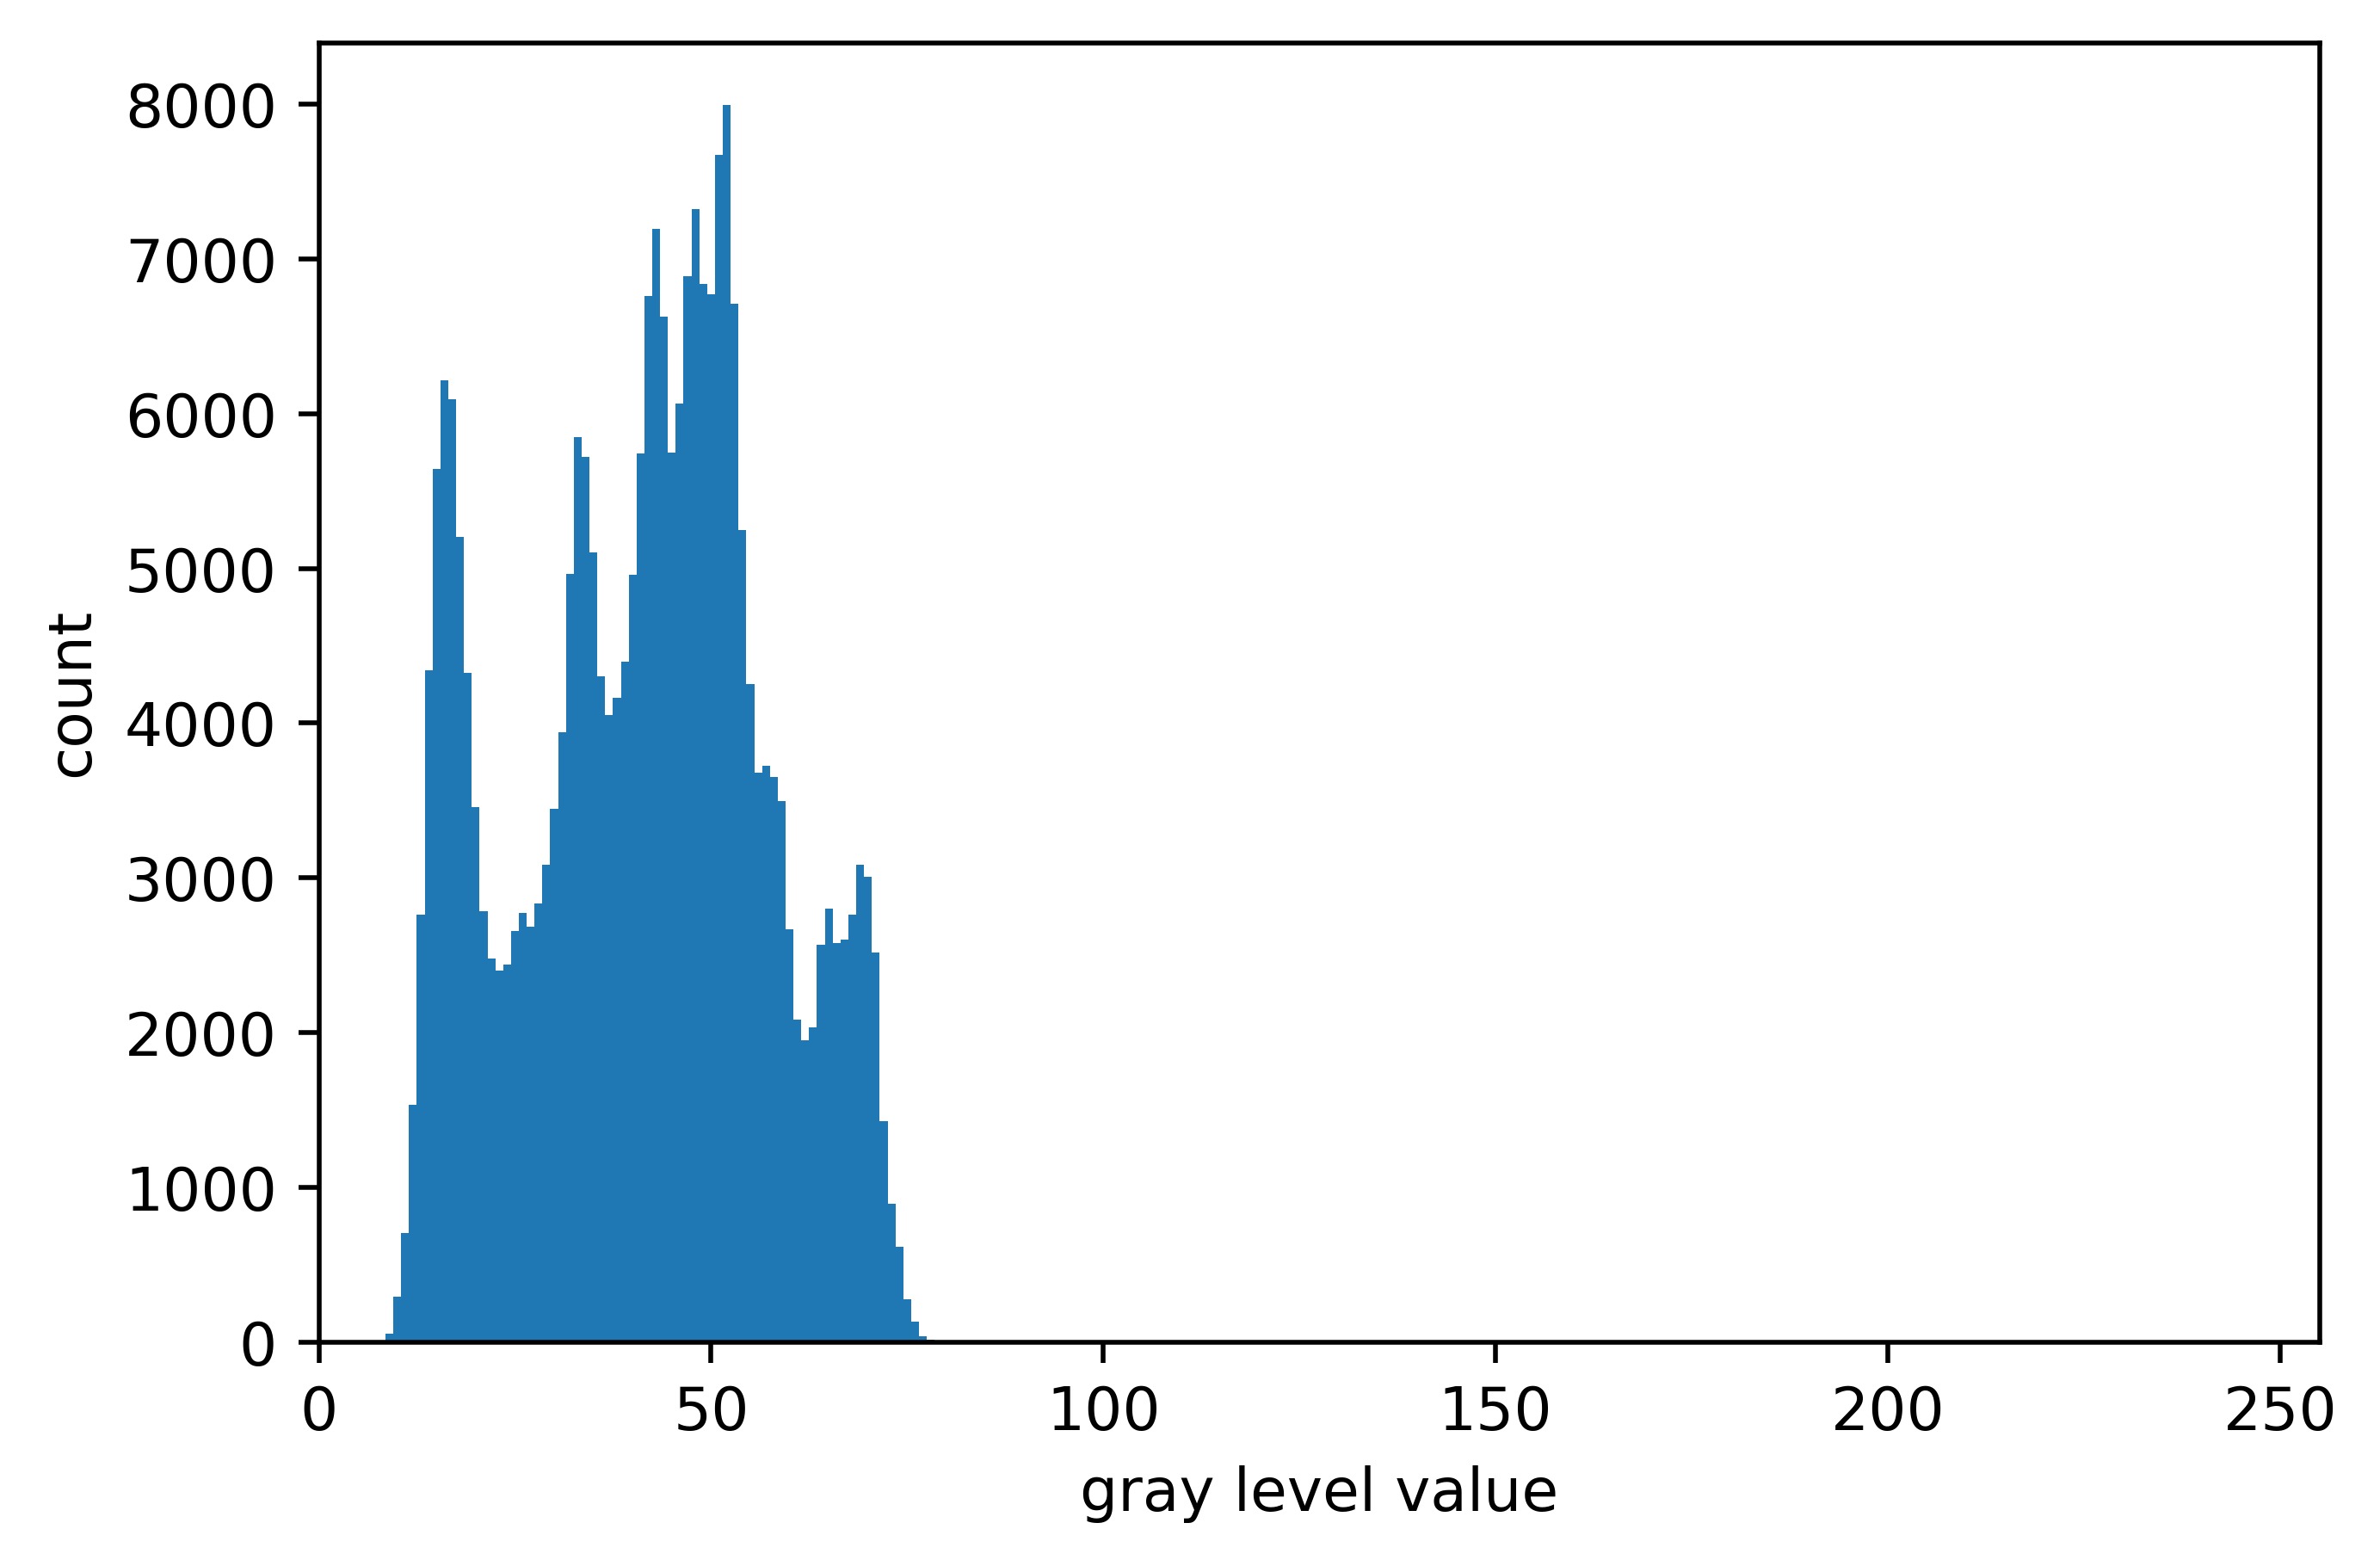

In [ ]:
value_count = [0]*256
for row in divid_3_lena_gray:
  for pix in row:
    value_count[pix]+=1
plt.figure(dpi=500)
plt.bar(list(range(256)),value_count,1)
plt.xlabel("gray level value")
plt.xlim(0,255)
plt.ylabel("count")
plt.show()

In [ ]:
value_cumsum = []
minlevel = -1
maxlevel = -1
sum_value = 0
novalue = True
for level, count in enumerate(value_count):
  sum_value += count
  value_cumsum.append(sum_value)
  if novalue and count>0:
    novalue=False
    minlevel = level
  if count>0:
    maxlevel = level

In [ ]:
new_value_count = [0]*256
transfor_list = [0]*256
Denominator = value_cumsum[maxlevel]-value_cumsum[minlevel]
Numerator = lambda x: value_cumsum[x]-value_cumsum[minlevel]
for level in range(minlevel, maxlevel+1):
  new_level = int(np.round(Numerator(level)*255/Denominator))
  transfor_list[level] = new_level
  new_value_count[new_level] += value_count[level]

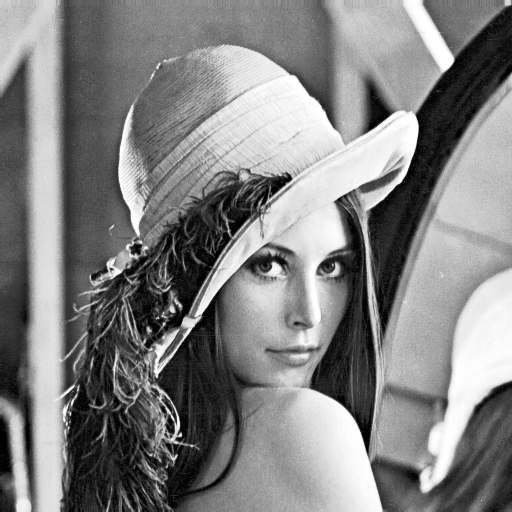

In [ ]:
hist_equalization_lena_gray = divid_3_lena_gray.copy()
for r,row in enumerate(hist_equalization_lena_gray):
  for c,_ in enumerate(row):
    hist_equalization_lena_gray[r,c] = transfor_list[hist_equalization_lena_gray[r,c]]
cv2_imshow(hist_equalization_lena_gray)

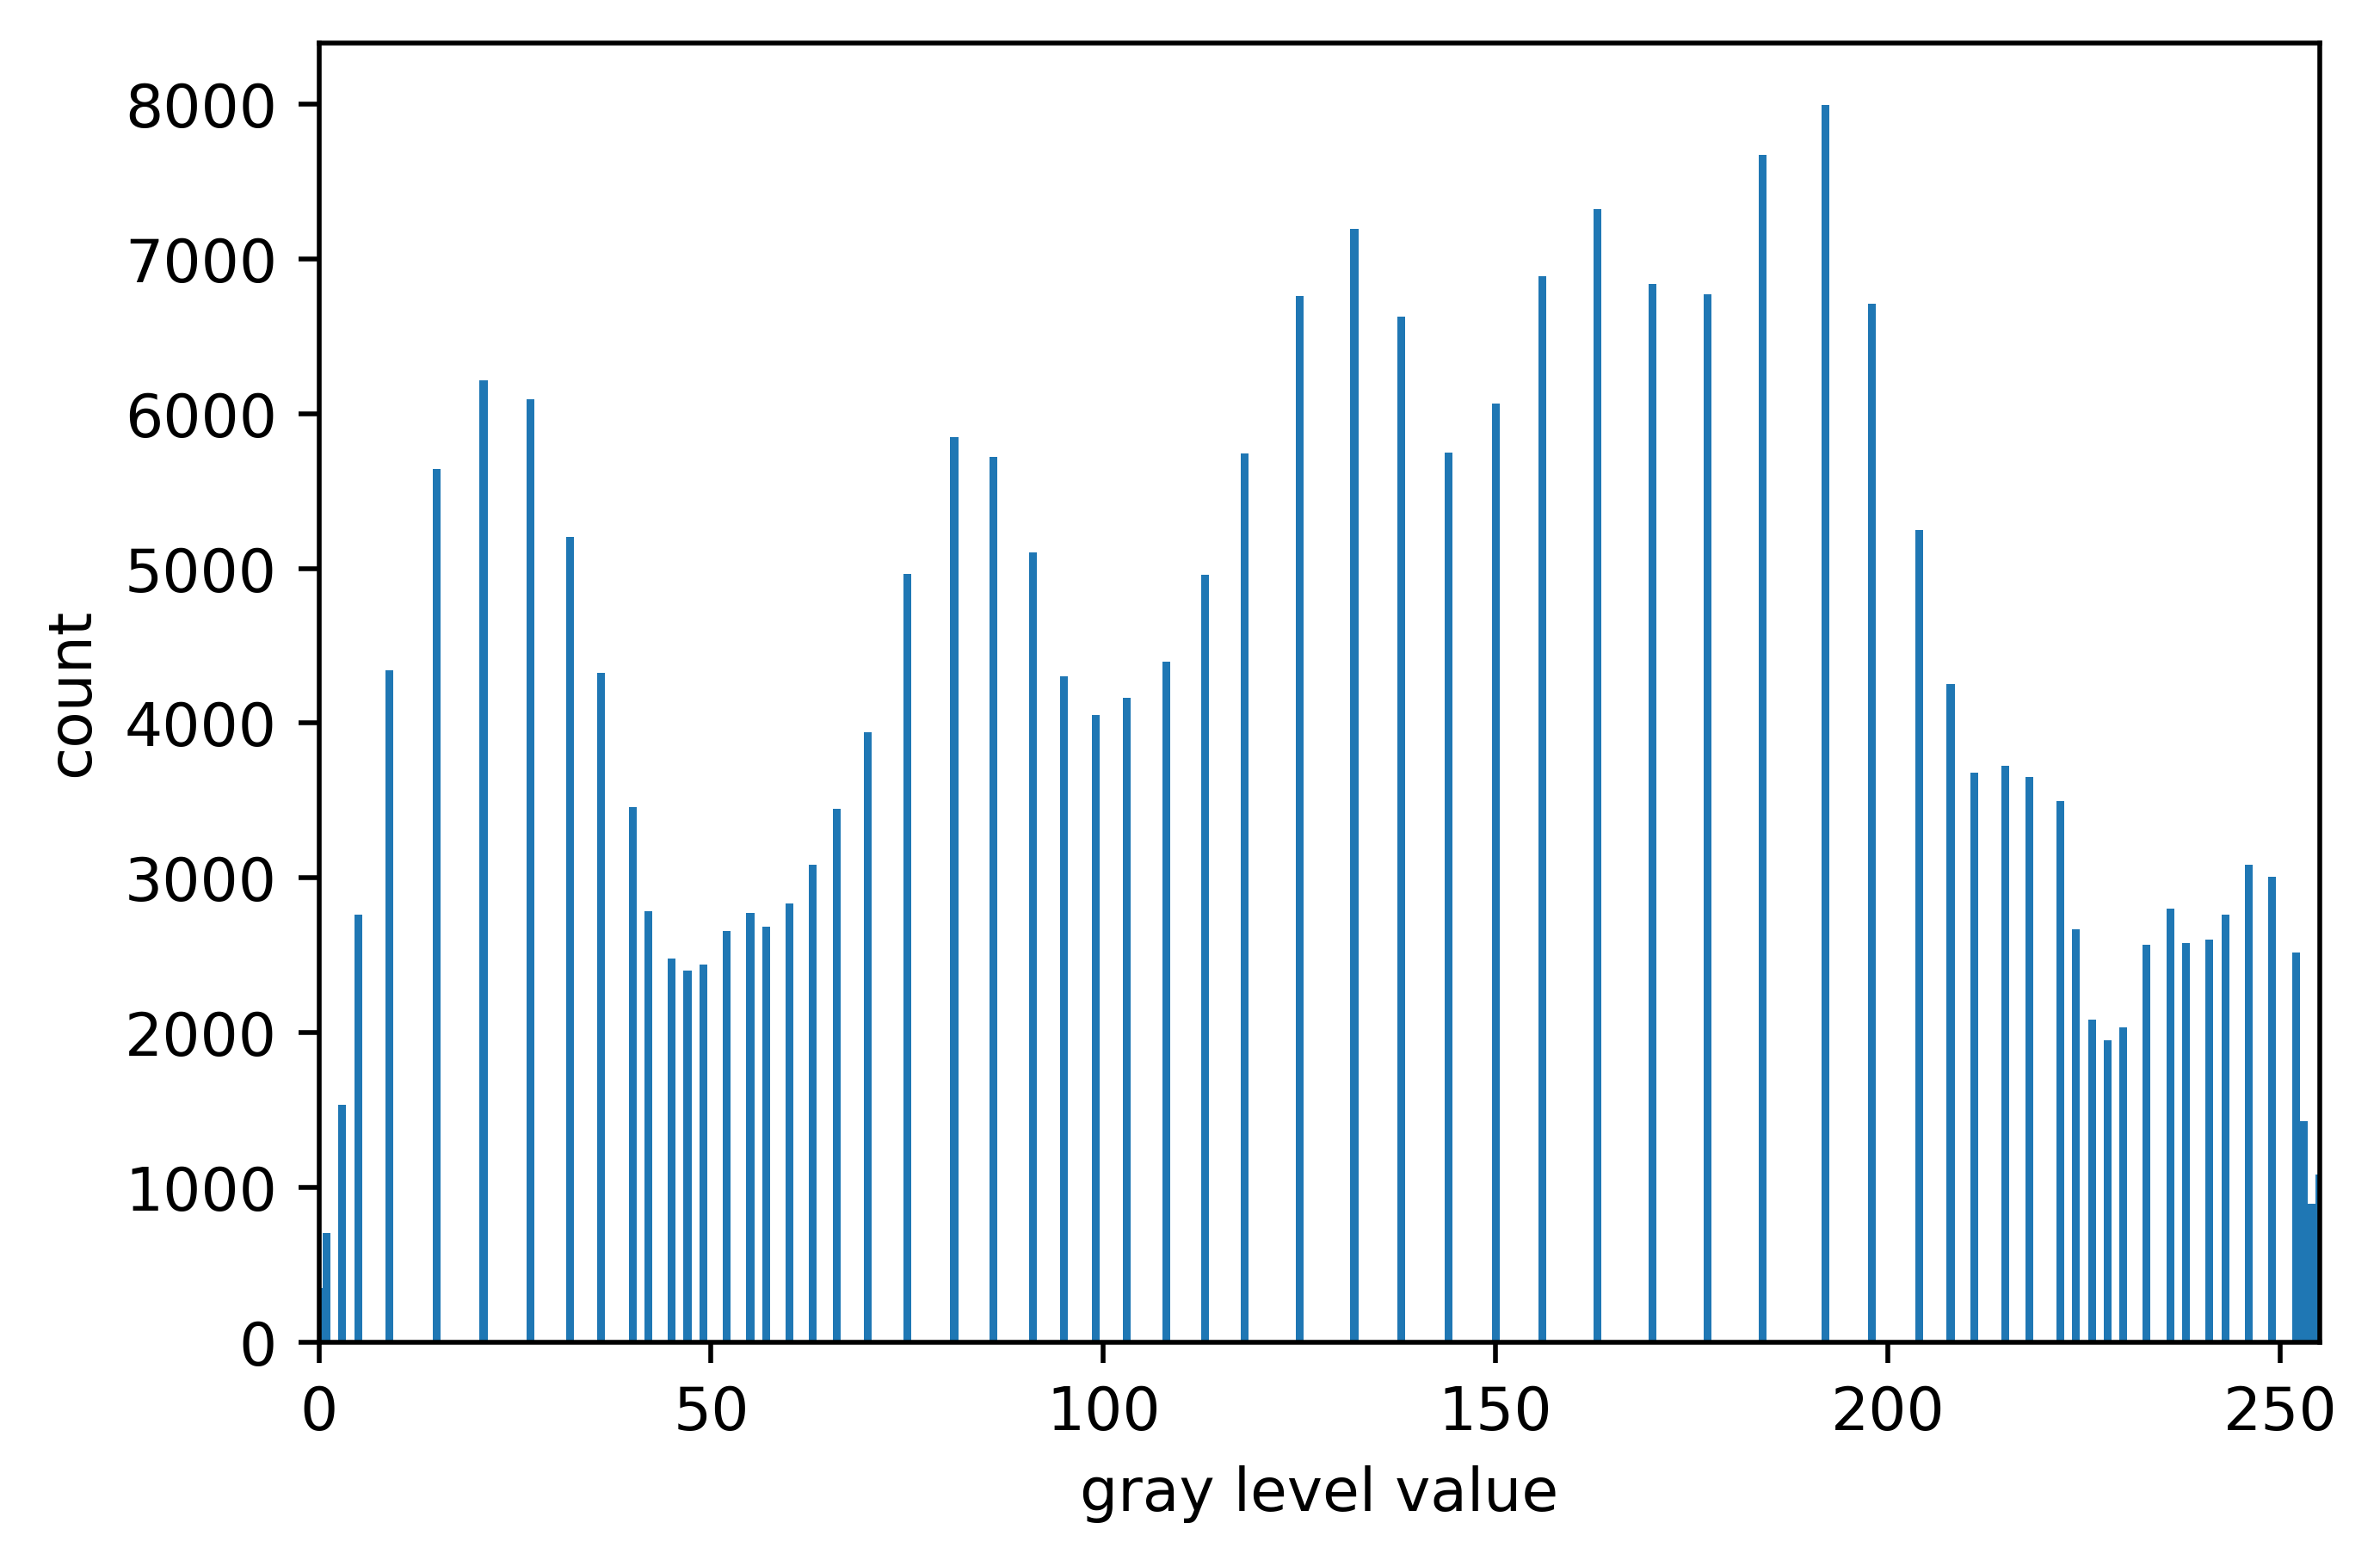

In [ ]:
plt.figure(dpi=500)
plt.bar(list(range(256)),new_value_count,1)
plt.xlabel("gray level value")
plt.xlim(0,255)
plt.ylabel("count")
plt.show()  

In [3]:
%%writefile /content/drive/MyDrive/CVHW/HW3.py
import cv2
import matplotlib.pyplot as plt
import numpy as np

lena_gray = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

value_count = [0]*256
for row in lena_gray:
  for pix in row:
    value_count[pix]+=1
plt.figure(dpi=500)
plt.bar(list(range(256)),value_count,1)
plt.xlabel("gray level value")
plt.xlim(0,255)
plt.ylabel("count")
plt.savefig('value_count_lena.png')

divid_3_lena_gray = np.uint8(np.rint(lena_gray/3))
cv2.imwrite('divid_3_lena_gray.bmp', divid_3_lena_gray)

value_count = [0]*256
for row in divid_3_lena_gray:
  for pix in row:
    value_count[pix]+=1
plt.figure(dpi=500)
plt.bar(list(range(256)),value_count,1)
plt.xlabel("gray level value")
plt.xlim(0,255)
plt.ylabel("count")
plt.savefig('value_count_divid_3_lena_gray.png')

value_cumsum = []
minlevel = -1
maxlevel = -1
sum_value = 0
novalue = True
for level, count in enumerate(value_count):
  sum_value += count
  value_cumsum.append(sum_value)
  if novalue and count>0:
    novalue=False
    minlevel = level
  if count>0:
    maxlevel = level

new_value_count = [0]*256
transfor_list = [0]*256
Denominator = value_cumsum[maxlevel]-value_cumsum[minlevel]
Numerator = lambda x: value_cumsum[x]-value_cumsum[minlevel]
for level in range(minlevel, maxlevel+1):
  new_level = int(np.round(Numerator(level)*255/Denominator))
  transfor_list[level] = new_level
  new_value_count[new_level] += value_count[level]

hist_equalization_lena_gray = divid_3_lena_gray.copy()
for r,row in enumerate(hist_equalization_lena_gray):
  for c,_ in enumerate(row):
    hist_equalization_lena_gray[r,c] = transfor_list[hist_equalization_lena_gray[r,c]]
cv2.imwrite('hist_equalization_lena_gray.bmp', hist_equalization_lena_gray)

plt.figure(dpi=500)
plt.bar(list(range(256)),new_value_count,1)
plt.xlabel("gray level value")
plt.xlim(0,255)
plt.ylabel("count")
plt.savefig('value_count_hist_equalization_lena_gray.png')

Overwriting /content/drive/MyDrive/CVHW/HW3.py
